In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv('formated_data_new.csv')

## Linear regression with all observations

In [3]:
prices = df['Current price in €']
nb_reviews = df['Number of reviews']
positive_rate = df['Positive rate in reviews in %']
steamDB_score = df['SteamDB score in %']
conf_class = df['Min configuration class']
n = len(prices)
const = np.ones(n)
X = np.column_stack((const, prices, nb_reviews, positive_rate, conf_class))
model = sm.OLS(steamDB_score, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 4.898e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:52:49   Log-Likelihood:                -47757.
No. Observations:               17130   AIC:                         9.552e+04
Df Residuals:                   17125   BIC:                         9.556e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5948      0.114    154.376      0.0

nb_reviews and positive_rate are correlated to the steamDB score, should we use them or not in our regression?

## Linear regression with only paid games

In [4]:
paying_games = prices != 0.
paying_prices = prices[paying_games]
paying_nb_reviews = nb_reviews[paying_games]
paying_positive_rate = positive_rate[paying_games]
paying_steamDB_score = steamDB_score[paying_games]
paying_conf_class = conf_class[paying_games]
n_1 = len(paying_prices)
const_1 = np.ones(n_1)
X_paying = np.column_stack((const_1, paying_prices, paying_nb_reviews, paying_positive_rate, paying_conf_class))
model_paying = sm.OLS(paying_steamDB_score, X_paying)
results_paying = model_paying.fit()
print(results_paying.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 4.170e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:52:49   Log-Likelihood:                -40035.
No. Observations:               14364   AIC:                         8.008e+04
Df Residuals:                   14359   BIC:                         8.012e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8158      0.123    145.362      0.0

There are no real difference with the previous regression

## Linear regression with cheap games

In [5]:
paying_games = prices < 3
paying_prices = prices[paying_games]
paying_nb_reviews = nb_reviews[paying_games]
paying_positive_rate = positive_rate[paying_games]
paying_steamDB_score = steamDB_score[paying_games]
paying_conf_class = conf_class[paying_games]
n_1 = len(paying_prices)
const_1 = np.ones(n_1)
X_paying = np.column_stack((const_1, paying_prices, paying_nb_reviews, paying_positive_rate, paying_conf_class))
model_paying = sm.OLS(paying_steamDB_score, X_paying)
results_paying = model_paying.fit()
print(results_paying.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.204e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:52:49   Log-Likelihood:                -28180.
No. Observations:               10301   AIC:                         5.637e+04
Df Residuals:                   10296   BIC:                         5.641e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7892      0.138    136.028      0.0

## Split games into categories depending on their genre

Linear regression for every genre, plot the different coefficients associated to each variable used in the regression

Same with different price ranges, or different number of reviews ranges

In [7]:
action = df[df['Genres'].str.contains("Action") == True]
adventure = df[df['Genres'].str.contains("Adventure") == True]
rpg = df[df['Genres'].str.contains("RPG") == True]
strategy = df[df['Genres'].str.contains("Strategy") == True]
simulation = df[df['Genres'].str.contains("Simulation") == True]
casual = df[df['Genres'].str.contains("Casual") == True]
indie = df[df['Genres'].str.contains("Indie") == True]
sports = df[df['Genres'].str.contains("Sports") == True]

<IPython.core.display.Javascript object>


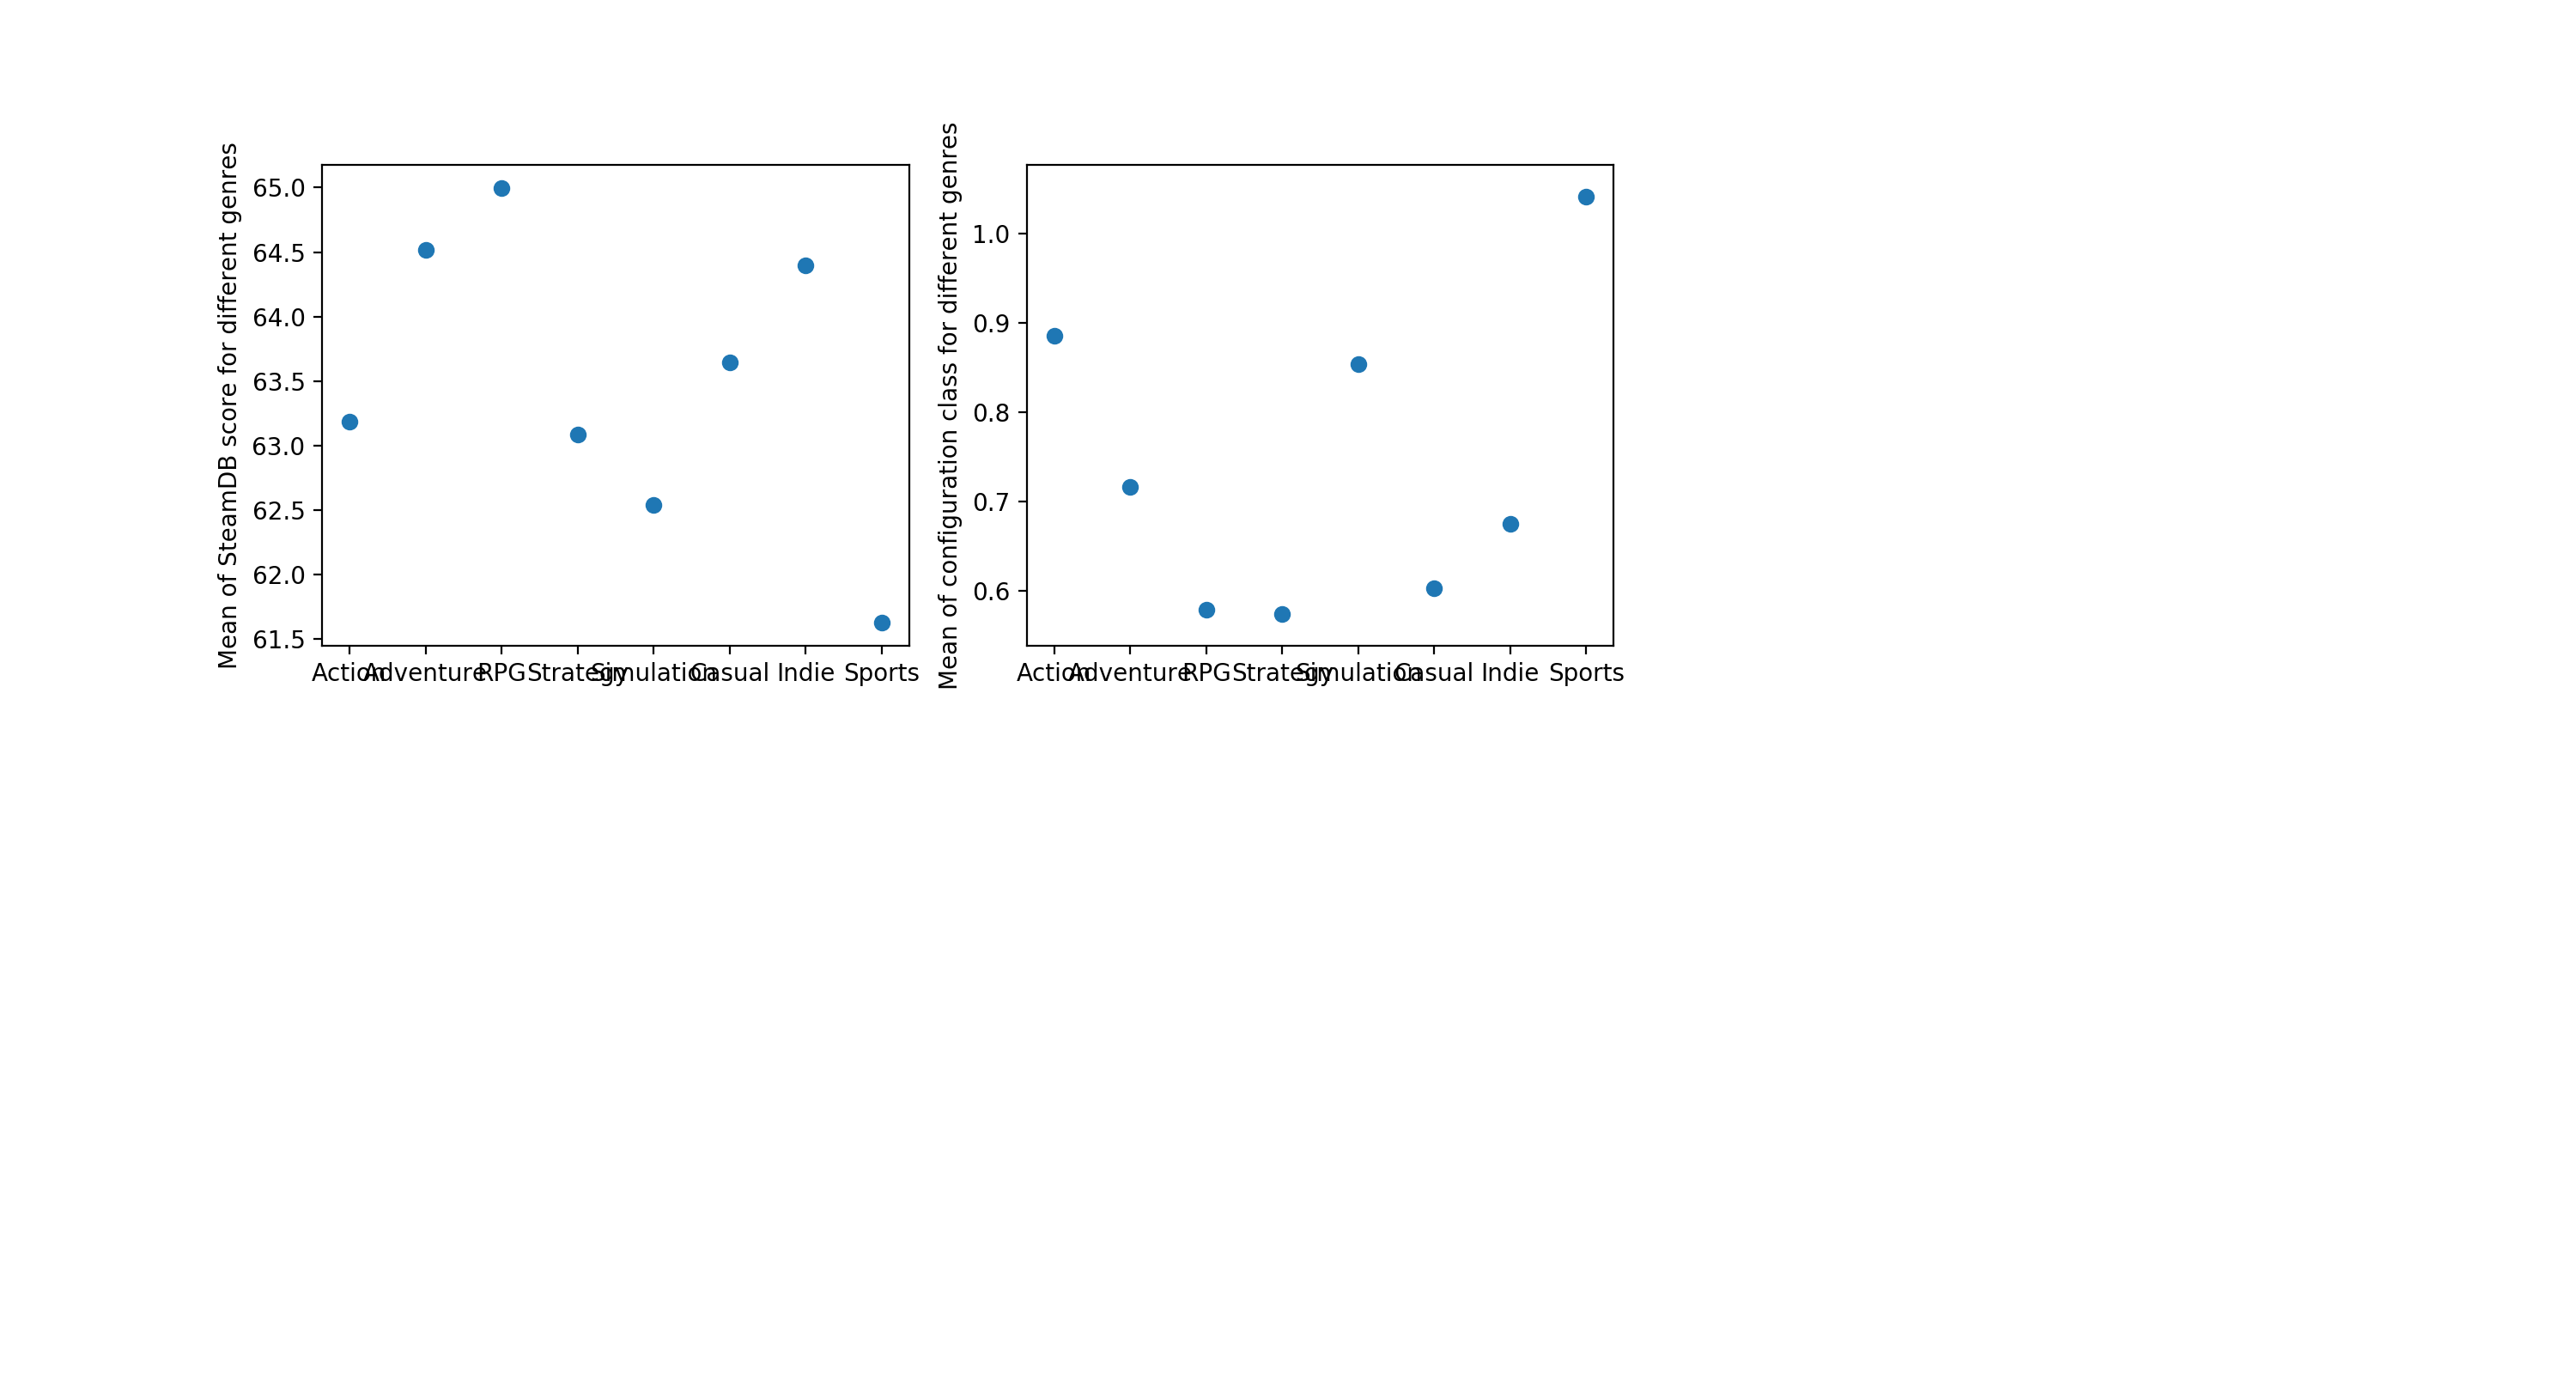

Text(0, 0.5, 'Mean of configuration class for different genres')

In [39]:
genres = ['Action', 'Adventure', 'RPG', 'Strategy', 'Simulation', 'Casual', 'Indie', 'Sports']
scores, classes = [], []
for genre in genres:
    df_genre = df[df['Genres'].str.contains(genre) == True]
    score_mean = np.mean(df_genre['SteamDB score in %'])
    class_mean = np.mean(df_genre['Min configuration class'])
    scores.append(score_mean)
    classes.append(class_mean)
plt.figure(figsize=(15,8))
plt.subplot(231)
plt.scatter(genres, scores)
plt.ylabel('Mean of SteamDB score for different genres')
plt.subplot(232)
plt.scatter(genres, classes)
plt.ylabel('Mean of configuration class for different genres')

In [9]:
action_prices = action['Current price in €']
action_nb_reviews = action['Number of reviews']
action_positive_rate = action['Positive rate in reviews in %']
action_steamDB_score = action['SteamDB score in %']
action_conf_class = action['Min configuration class']
n = len(action_prices)
const = np.ones(n)
X = np.column_stack((const, action_prices, action_nb_reviews, action_positive_rate, action_conf_class))
model = sm.OLS(action_steamDB_score, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 2.063e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:52:50   Log-Likelihood:                -19091.
No. Observations:                6923   AIC:                         3.819e+04
Df Residuals:                    6918   BIC:                         3.823e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9721      0.172    104.227      0.0

In [10]:
sports_prices = sports['Current price in €']
sports_nb_reviews = sports['Number of reviews']
sports_positive_rate = sports['Positive rate in reviews in %']
sports_steamDB_score = sports['SteamDB score in %']
sports_conf_class = sports['Min configuration class']
n_sports = len(sports_prices)
const = np.ones(n_sports)
X = np.column_stack((const, sports_prices, sports_nb_reviews, sports_positive_rate, sports_conf_class))
model = sm.OLS(sports_steamDB_score, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2660.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:52:50   Log-Likelihood:                -2421.7
No. Observations:                 892   AIC:                             4853.
Df Residuals:                     887   BIC:                             4877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0772      0.452     42.232      0.0

The coefficient associated to the configuration class changes a little between sport games and action games.

## Visualisation of some information for the different configuration class

The goal is to find some differences between the class that could be useful to our interpretation

In [14]:
class0 = conf_class==0
class1 = conf_class==1
class2 = conf_class==2
class3 = conf_class==3

In [15]:
score_0 = steamDB_score[class0]
price_0 = prices[class0]
print('Class0: Score mean: {}, Price mean: {}'.format(np.mean(score_0), np.mean(price_0)))
score_1 = steamDB_score[class1]
price_1 = prices[class1]
print('Class1: Score mean: {}, Price mean: {}'.format(np.mean(score_1), np.mean(price_1)))
score_2 = steamDB_score[class2]
price_2 = prices[class2]
print('Class2: Score mean: {}, Price mean: {}'.format(np.mean(score_2), np.mean(price_2)))
score_3 = steamDB_score[class3]
price_3 = prices[class3]
print('Class3: Score mean: {}, Price mean: {}'.format(np.mean(score_3), np.mean(price_3)))
# ca serait bien de plot ca pour voir l'augmentation

Class0: Score mean: 64.4606555882056, Price mean: 3.302861485459684
Class1: Score mean: 64.02811452513976, Price mean: 3.9677122905027544
Class2: Score mean: 63.73533247533265, Price mean: 5.433397683397642
Class3: Score mean: 61.58702222222222, Price mean: 6.160407407407352


In [16]:
print('Number of games in each class')
print(len(score_0), len(score_1), len(score_2), len(score_3))

Number of games in each class
9869 3580 2331 1350


In [17]:
print('Proportion of good grades > 80%')
good_grades_0 = score_0[score_0 > 80]
prop_good_grades_0 = len(good_grades_0) / len(score_0) * 100
print('class 0:', prop_good_grades_0)
good_grades_1 = score_1[score_1 > 80]
prop_good_grades_1 = len(good_grades_1) / len(score_1) * 100
print('class 1:', prop_good_grades_1)
good_grades_2 = score_2[score_2 > 80]
prop_good_grades_2 = len(good_grades_2) / len(score_2) * 100
print('class 2:', prop_good_grades_2)
good_grades_3 = score_3[score_3 > 80]
prop_good_grades_3 = len(good_grades_3) / len(score_3) * 100
print('class 3:', prop_good_grades_3)

Proportion of good grades > 80%
class 0: 13.89198500354646
class 1: 14.24581005586592
class 2: 12.312312312312311
class 3: 8.592592592592592


In [18]:
print('Proportion of low grades < 50%')
low_grades_0 = score_0[score_0 < 50]
prop_low_grades_0 = len(low_grades_0) / len(score_0) * 100
print('class 0:', prop_low_grades_0)
low_grades_1 = score_1[score_1 < 50]
prop_low_grades_1 = len(low_grades_1) / len(score_1) * 100
print('class 1:', prop_low_grades_1)
low_grades_2 = score_2[score_2 < 50]
prop_low_grades_2 = len(low_grades_2) / len(score_2) * 100
print('class 2:', prop_low_grades_2)
low_grades_3 = score_3[score_3 < 50]
prop_low_grades_3 = len(low_grades_3) / len(score_3) * 100
print('class 3:', prop_low_grades_3)

Proportion of low grades < 50%
class 0: 13.993312392339648
class 1: 15.307262569832403
class 2: 14.199914199914199
class 3: 17.555555555555554


<IPython.core.display.Javascript object>


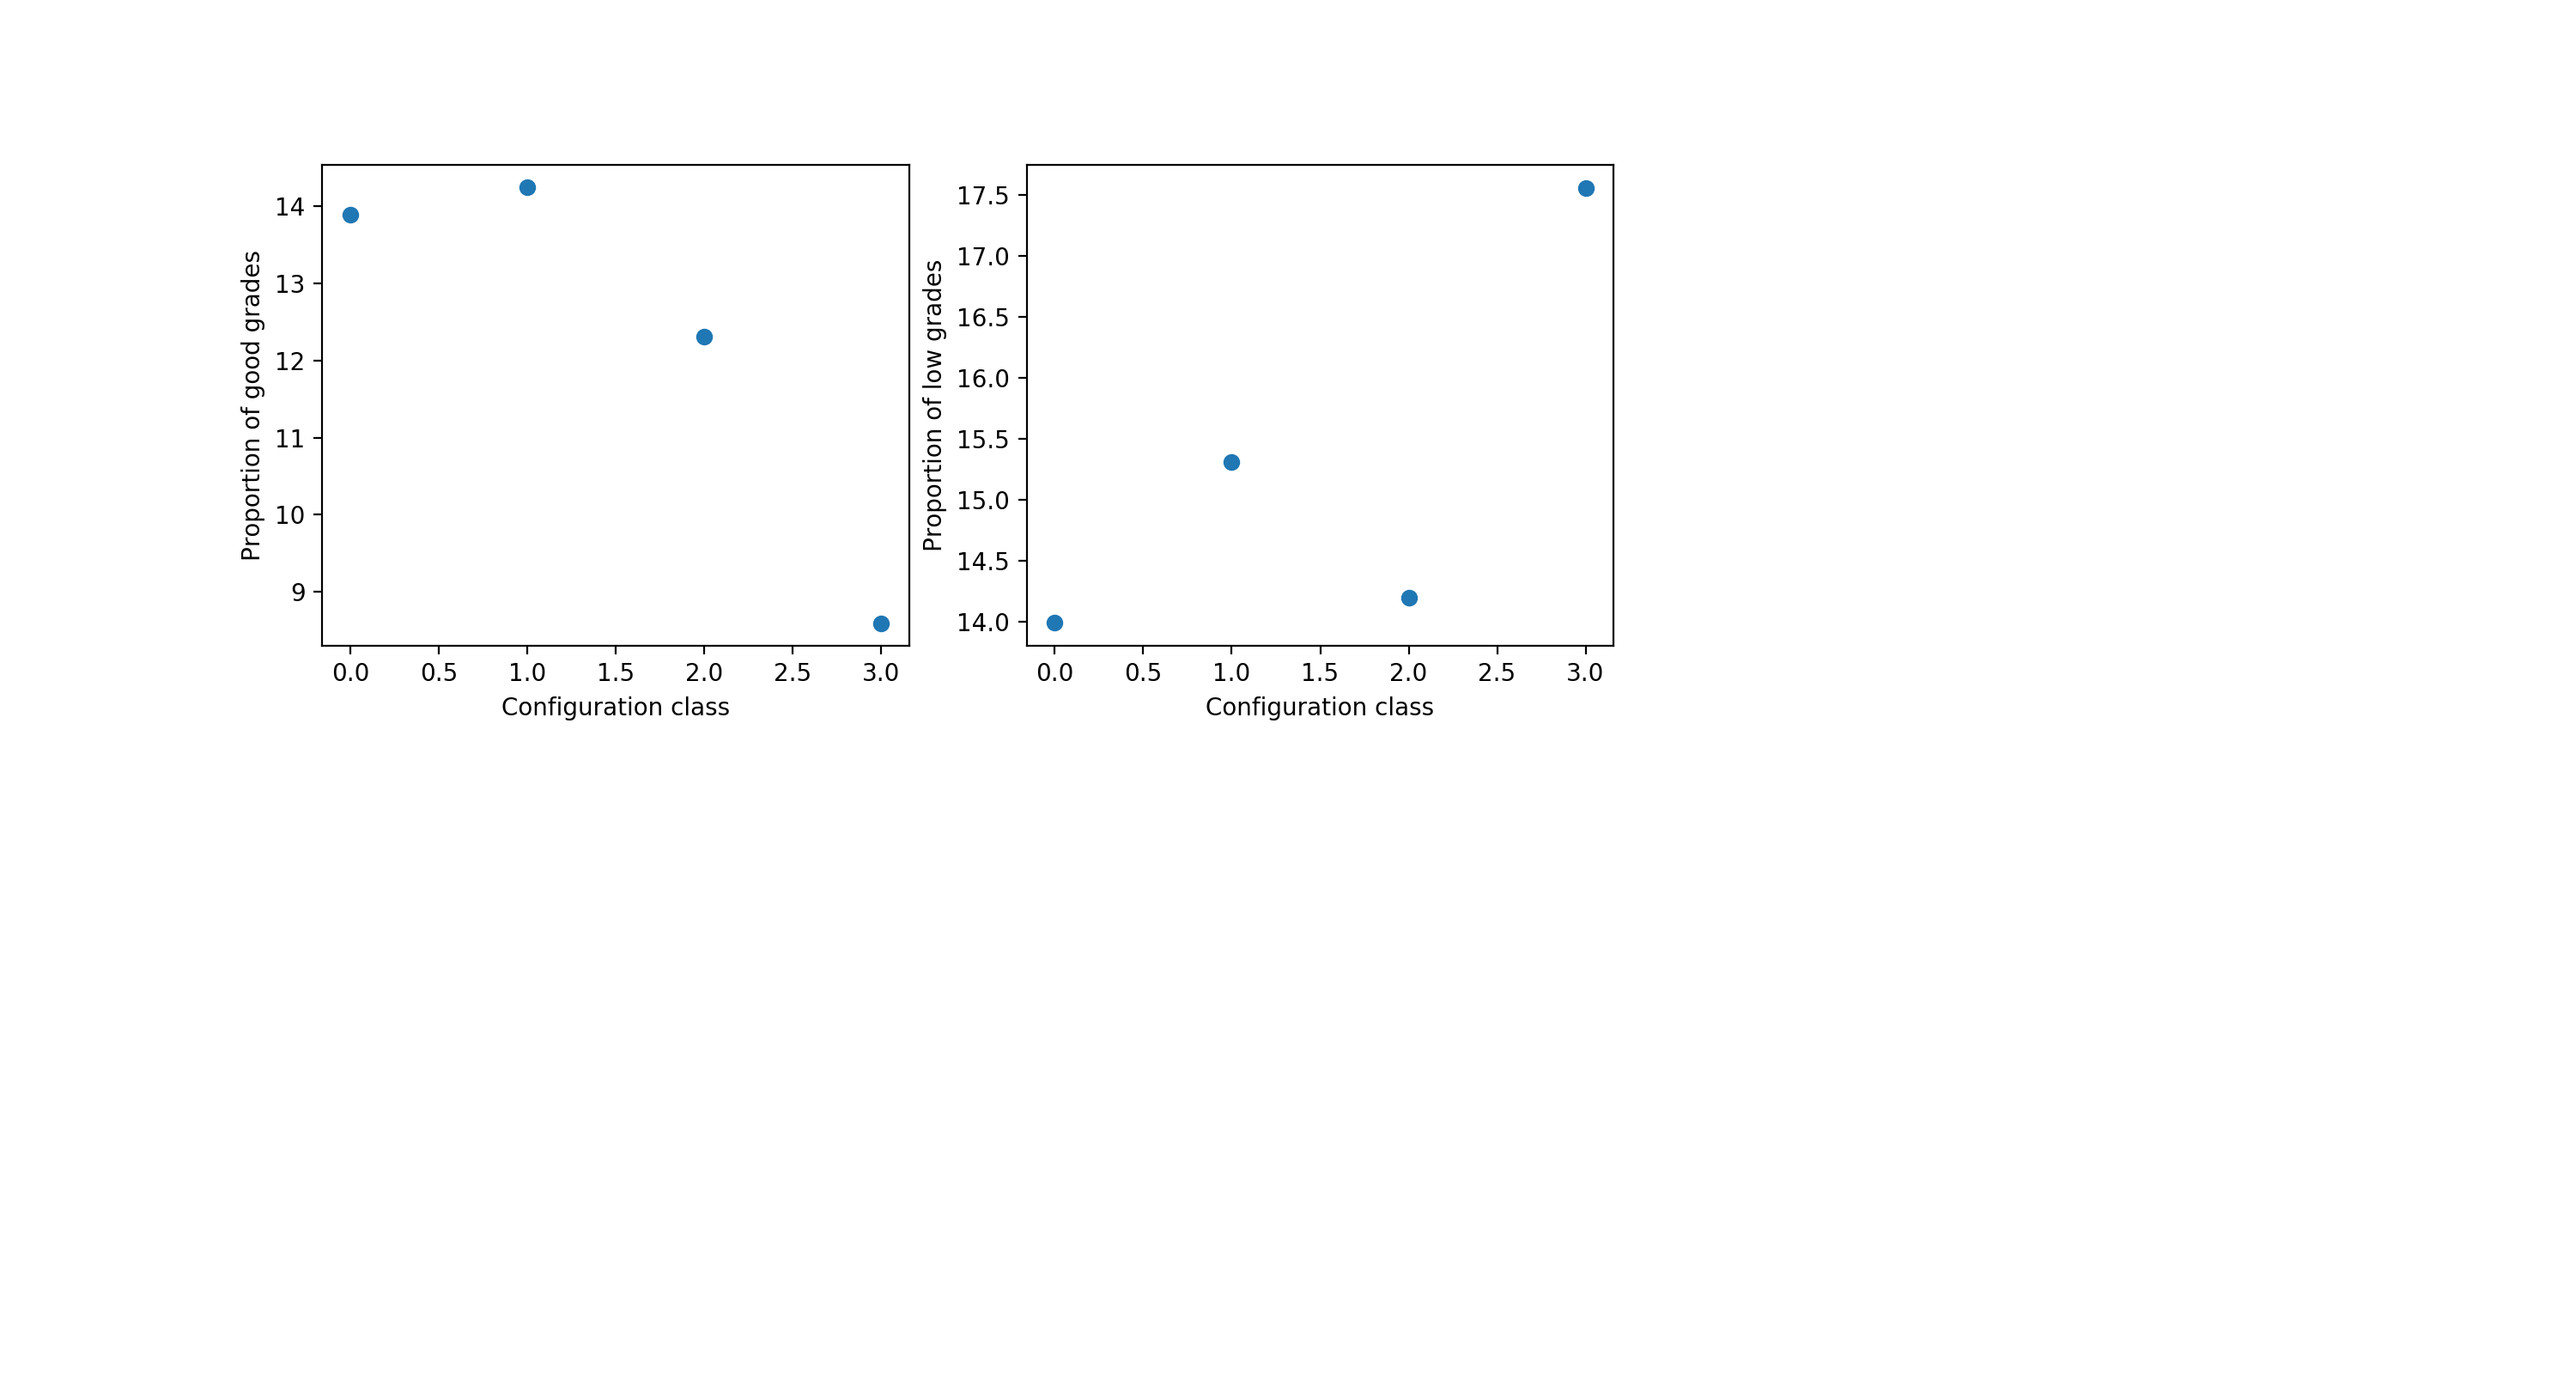

Text(0, 0.5, 'Proportion of low grades')

In [37]:
x = [0,1,2,3]
y_good = [prop_good_grades_0, prop_good_grades_1, prop_good_grades_2, prop_good_grades_3]
y_low = [prop_low_grades_0, prop_low_grades_1, prop_low_grades_2, prop_low_grades_3]
plt.figure(figsize=(15,8))
plt.subplot(231)
plt.scatter(x,y_good)
plt.xlabel('Configuration class')
plt.ylabel('Proportion of good grades')
plt.subplot(232)
plt.scatter(x,y_low)
plt.xlabel('Configuration class')
plt.ylabel('Proportion of low grades')

## Linear regression with famous and not famous games

In [26]:
small_games = nb_reviews < 100
blockbusters = nb_reviews > 2000
sg_prices = prices[small_games]
sg_conf_class = conf_class[small_games]
sg_steamDB_score = steamDB_score[small_games]
n_sg = len(sg_prices)
const_sg = np.ones(n_sg)
X_sg = np.column_stack((const_sg, sg_prices, sg_conf_class))
results_sg = sm.OLS(sg_steamDB_score, X_sg).fit()
print(results_sg.summary())

bb_prices = prices[blockbusters]
bb_conf_class = conf_class[blockbusters]
bb_steamDB_score = steamDB_score[blockbusters]
n_bb = len(bb_prices)
const_bb = np.ones(n_bb)
X_bb = np.column_stack((const_bb, bb_prices, bb_conf_class))
results_bb = sm.OLS(bb_steamDB_score, X_bb).fit()
print(results_bb.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     38.62
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.89e-17
Time:                        16:52:52   Log-Likelihood:                -50805.
No. Observations:               12955   AIC:                         1.016e+05
Df Residuals:                   12952   BIC:                         1.016e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.6139      0.148    409.872      0.0

<IPython.core.display.Javascript object>


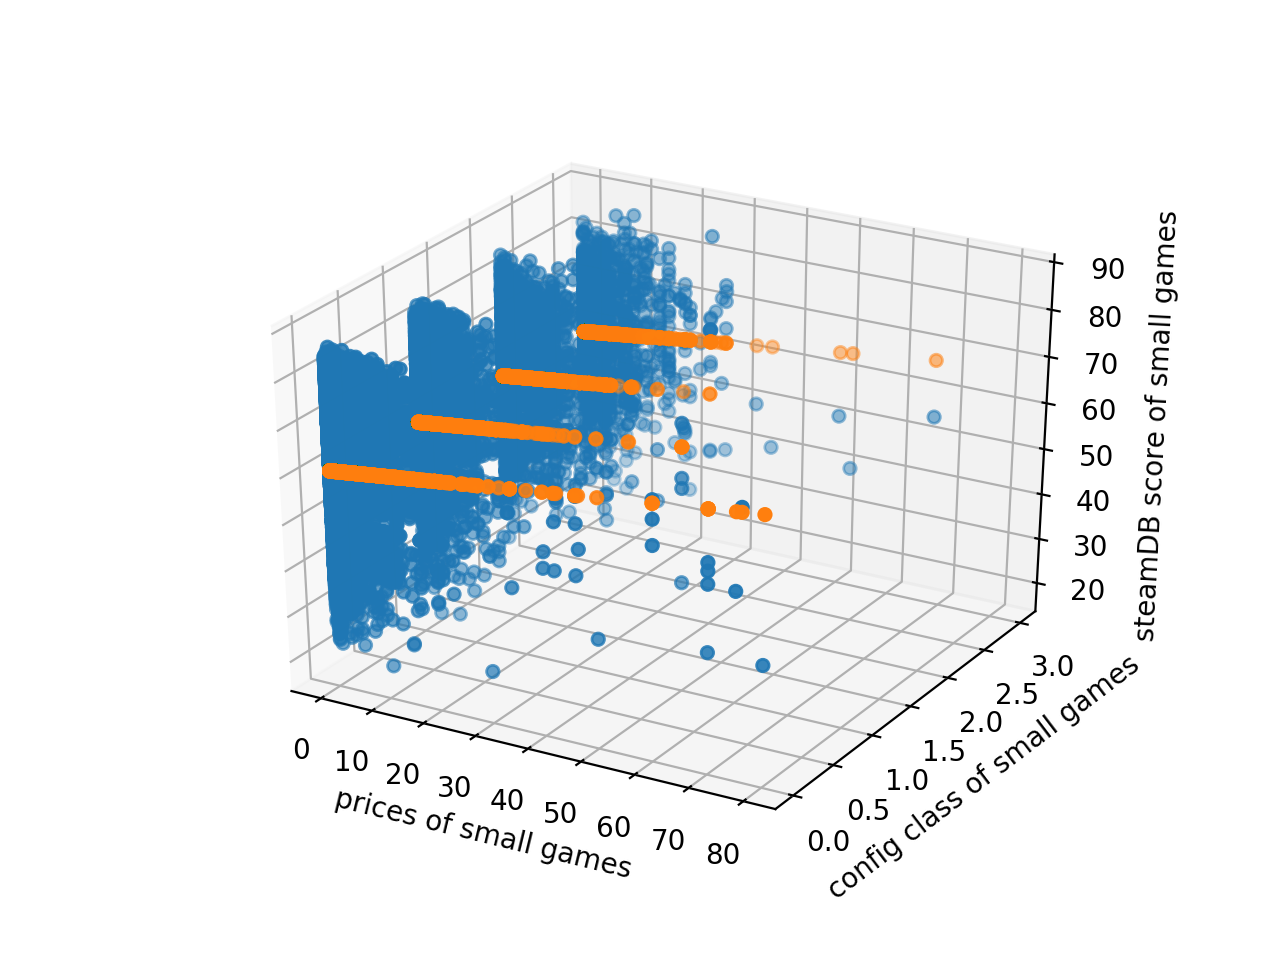

In [33]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('prices of small games')
ax.set_ylabel('config class of small games')
ax.set_zlabel('steamDB score of small games')
ax.scatter3D(sg_prices, sg_conf_class, sg_steamDB_score)
z_sg = results_sg.params[0] + results_sg.params[1]*sg_prices + results_sg.params[2]*sg_conf_class
ax.scatter3D(sg_prices, sg_conf_class, z_sg)

<IPython.core.display.Javascript object>


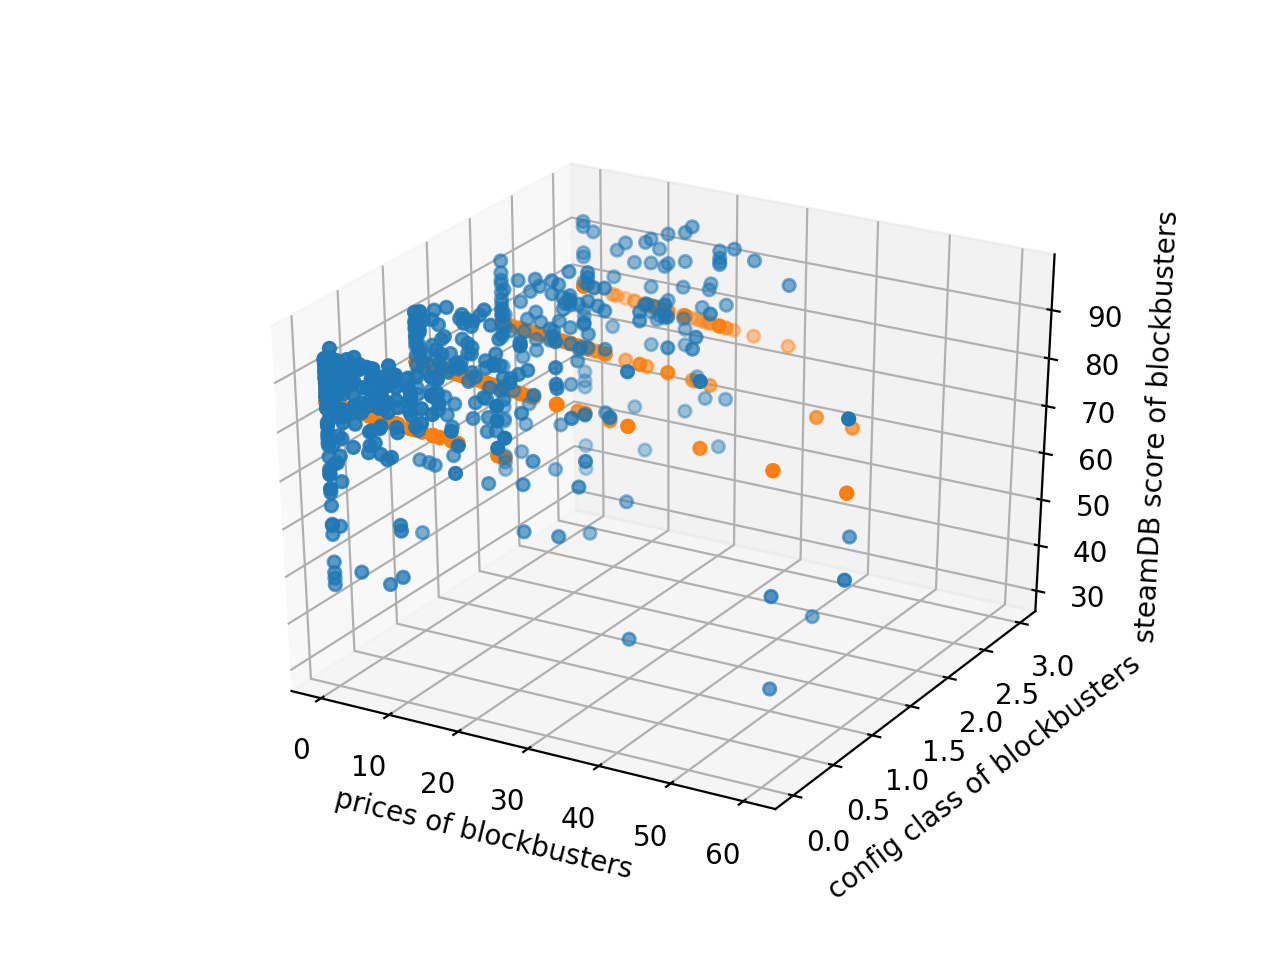

In [34]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('prices of blockbusters')
ax.set_ylabel('config class of blockbusters')
ax.set_zlabel('steamDB score of blockbusters')
ax.scatter3D(bb_prices, bb_conf_class, bb_steamDB_score)
z_bb = results_bb.params[0] + results_bb.params[1]*bb_prices + results_bb.params[2]*bb_conf_class
ax.scatter3D(bb_prices, bb_conf_class, z_bb)

The coefficients are changing but the number of observations reduces a lot with blockbusters compared to small games.

## Use dates to see its influence

In [29]:
dates = df['Release date']
print(dates.min(), dates.max())

2009-06-16 2020-12-25


In [35]:
old_games = dates < '2017-01-01'
recent_games = dates > '2019-01-01'
og_prices = prices[old_games]
og_conf_class = conf_class[old_games]
og_steamDB_score = steamDB_score[old_games]
n_og = len(og_prices)
const_og = np.ones(n_og)
X_og = np.column_stack((const_og, og_prices, og_conf_class))
results_og = sm.OLS(og_steamDB_score, X_og).fit()
print(results_og.summary())

rg_prices = prices[recent_games]
rg_conf_class = conf_class[recent_games]
rg_steamDB_score = steamDB_score[recent_games]
n_rg = len(rg_prices)
print(n_rg)
const_rg = np.ones(n_rg)
X_rg = np.column_stack((const_rg, rg_prices, rg_conf_class))
results_rg = sm.OLS(rg_steamDB_score, X_rg).fit()
print(results_rg.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.708
Date:                Sun, 17 Jan 2021   Prob (F-statistic):            0.00126
Time:                        16:57:56   Log-Likelihood:                -5843.5
No. Observations:                1455   AIC:                         1.169e+04
Df Residuals:                    1452   BIC:                         1.171e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.3571      0.484    133.101      0.0

Release date does not seem to influence the configuration class variable

## Linear regression with binary variables for the configuration classes

Use two binary variables class0 and class123: linear regression with those variables instead of config_class

In [31]:
class123 = conf_class>=1

In [32]:
prices = df['Current price in €']
nb_reviews = df['Number of reviews']
positive_rate = df['Positive rate in reviews in %']
steamDB_score = df['SteamDB score in %']
l_steamDB_score = np.log(steamDB_score)
conf_class = df['Min configuration class']
n = len(prices)
const = np.ones(n)
X_bin = np.column_stack((const, prices, class123))
results_bin = sm.OLS(l_steamDB_score, X_bin).fit()
print(results_bin.summary())

                            OLS Regression Results                            
Dep. Variable:     SteamDB score in %   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     92.69
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           9.14e-41
Time:                        16:52:53   Log-Likelihood:                 639.80
No. Observations:               17130   AIC:                            -1274.
Df Residuals:                   17127   BIC:                            -1250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1267      0.003   1605.981      0.0

Overall, with all the observations: A game that is in class 1, 2 or 3 will tend to have a lower steamDB score of 2% compared to games that are in class 0.

#### Other interesting analysis
    
Same linear regression as above but on smaller sets of observations: split with genres, price ranges or number of reviews ranges.